# Introduction


For our machine learning project, our goal is to use an existing dataset and perform clustering using unsupervised machine learning methods to obtain different insights from the dataset that relate to how we can categorize foods. There isn’t a specific insight we hope to find, rather we plan to use parameter tuning to explore what possible insights can be gathered from the raw data that may teach us something new or provoke new questions regarding food nutrition. The dataset we plan to perform unsupervised learning on contains raw data on nutritional metrics of many different foods (including calories, carbohydrates, sugars etc.). 

# Data Description


The dataset that will be used for this project is available publicly online and is provided in the format of a csv file (link to dataset: https://corgis-edu.github.io/corgis/csv/food/) . The dataset comes from the ‘CORGIS Datasets Project’ which is described to be ‘The Collection of Really Great, Interesting, Situated Datasets’.  The specific data in the dataset was sourced from the ‘United States Department of Agriculture’s Food Composition Database’. 

The dataset consists of 7083 records/rows and provides nutritional information on a mix of foods and beverages. There are 38 columns/features present in the dataset. The features of the dataset include both numerical and categorical data which are represented in the form of strings for categorical data, and integers and floats for numerical data. Each of the numeric features represent the quantity of a certain attribute within 100 grams of the food listed in the “Description” column. In table 1, all the features from the dataset are presented along with information regarding the data type they hold and an example value.


# Machine Learning

### Setup

#### Import Statements

In [1]:
import plotly.express
import seaborn as sns
import seaborn.objects as so
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn import decomposition 
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from kneed import KneeLocator

#### Import Data

Read data from csv

In [2]:
food = pd.read_csv('food.csv') 
food 


,Category,Description,Nutrient Data Bank Number,Data.Alpha Carotene,Data.Beta Carotene,Data.Beta Cryptoxanthin,Data.Carbohydrate,Data.Cholesterol,Data.Choline,Data.Fiber,...,Data.Major Minerals.Phosphorus,Data.Major Minerals.Potassium,Data.Major Minerals.Sodium,Data.Major Minerals.Zinc,Data.Vitamins.Vitamin A - RAE,Data.Vitamins.Vitamin B12,Data.Vitamins.Vitamin B6,Data.Vitamins.Vitamin C,Data.Vitamins.Vitamin E,Data.Vitamins.Vitamin K
0,Milk,"Milk, human",11000000,0,7,0,6.89,14,16.0,0.0,...,14,51,17,0.17,61,0.05,0.011,5.0,0.08,0.3
1,Milk,"Milk, NFS",11100000,0,4,0,4.87,8,17.9,0.0,...,103,157,39,0.42,59,0.56,0.060,0.1,0.03,0.2
2,Milk,"Milk, whole",11111000,0,7,0,4.67,12,17.8,0.0,...,101,150,38,0.41,32,0.54,0.061,0.0,0.05,0.3
3,Milk,"Milk, low sodium, whole",11111100,0,7,0,4.46,14,16.0,0.0,...,86,253,3,0.38,29,0.36,0.034,0.9,0.08,0.3
4,Milk,"Milk, calcium fortified, whole",11111150,0,7,0,4.67,12,17.8,0.0,...,101,150,38,0.41,32,0.54,0.061,0.0,0.05,0.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7078,Tomatoes as ingredient in omelet,Tomatoes as ingredient in omelet,99997802,103,464,0,5.48,0,7.4,1.6,...,30,278,6,0.21,43,0.00,0.104,18.2,0.60,8.8
7079,Other vegetables as ingredient in omelet,Other vegetables as ingredient in omelet,99997804,1,11,0,4.81,0,19.4,1.4,...,96,364,6,0.58,1,0.04,0.123,6.3,0.03,0.4
7080,Vegetables as ingredient in curry,Vegetables as ingredient in curry,99997810,368,994,0,11.60,0,14.6,2.2,...,46,312,19,0.28,98,0.00,0.177,16.2,0.24,8.9
7081,Sauce as ingredient in hamburgers,Sauce as ingredient in hamburgers,99998130,0,194,4,17.14,13,20.0,0.6,...,33,190,845,0.21,21,0.04,0.104,2.5,1.90,50.8


Omit data description columns 

In [3]:
food = food[food.columns[3:]]
food

,Data.Alpha Carotene,Data.Beta Carotene,Data.Beta Cryptoxanthin,Data.Carbohydrate,Data.Cholesterol,Data.Choline,Data.Fiber,Data.Lutein and Zeaxanthin,Data.Lycopene,Data.Niacin,...,Data.Major Minerals.Phosphorus,Data.Major Minerals.Potassium,Data.Major Minerals.Sodium,Data.Major Minerals.Zinc,Data.Vitamins.Vitamin A - RAE,Data.Vitamins.Vitamin B12,Data.Vitamins.Vitamin B6,Data.Vitamins.Vitamin C,Data.Vitamins.Vitamin E,Data.Vitamins.Vitamin K
0,0,7,0,6.89,14,16.0,0.0,0,0,0.177,...,14,51,17,0.17,61,0.05,0.011,5.0,0.08,0.3
1,0,4,0,4.87,8,17.9,0.0,0,0,0.110,...,103,157,39,0.42,59,0.56,0.060,0.1,0.03,0.2
2,0,7,0,4.67,12,17.8,0.0,0,0,0.105,...,101,150,38,0.41,32,0.54,0.061,0.0,0.05,0.3
3,0,7,0,4.46,14,16.0,0.0,0,0,0.043,...,86,253,3,0.38,29,0.36,0.034,0.9,0.08,0.3
4,0,7,0,4.67,12,17.8,0.0,0,0,0.105,...,101,150,38,0.41,32,0.54,0.061,0.0,0.05,0.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7078,103,464,0,5.48,0,7.4,1.6,142,2597,0.637,...,30,278,6,0.21,43,0.00,0.104,18.2,0.60,8.8
7079,1,11,0,4.81,0,19.4,1.4,18,0,3.678,...,96,364,6,0.58,1,0.04,0.123,6.3,0.03,0.4
7080,368,994,0,11.60,0,14.6,2.2,225,458,0.773,...,46,312,19,0.28,98,0.00,0.177,16.2,0.24,8.9
7081,0,194,4,17.14,13,20.0,0.6,112,7237,0.917,...,33,190,845,0.21,21,0.04,0.104,2.5,1.90,50.8


#### Exploratory Data Analysis 

Based on the dimensions of the food dataset we see that it contains 7083 rows/entries each of which has 35 features. 

In [4]:
food.shape

(7083, 35)

From the heatmap below, we can see apart from the diagonal there are a few moderate to highly correlated features both positively and negatively correlated such as Thiamin and Carbohydrate.
ELABORATE................

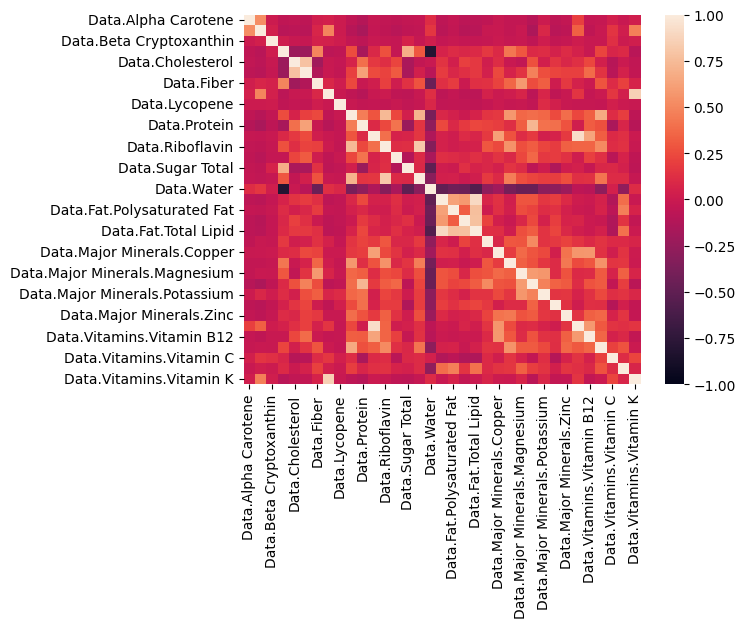

In [5]:
heatMap = sns.heatmap(food.corr(), vmin=-1, vmax=1) # Create a heatmap with correlation values between -1 and 1 

We define a moderate to high correlation to have values between 0.75 and 1, we omit anything with value 1 to avoid outputting perfect feature correlations with themselves as observed in the diagonal of the heat map.

In [6]:
food_temp = food.corr()

s = set()
for index, row in food_temp.iterrows():
    for i, x in enumerate(row):
        if abs(x) >= 0.75 and abs(x)!=1:
            s.add(tuple(sorted([food.columns[0:][i], index, str(round(x, 2))])))

for x in s:
    print(x)


('-0.81', 'Data.Carbohydrate', 'Data.Water')
('0.85', 'Data.Lutein and Zeaxanthin', 'Data.Vitamins.Vitamin K')
('0.78', 'Data.Fat.Saturated Fat', 'Data.Fat.Total Lipid')
('0.77', 'Data.Fat.Polysaturated Fat', 'Data.Fat.Total Lipid')
('0.9', 'Data.Fat.Monosaturated Fat', 'Data.Fat.Total Lipid')
('0.82', 'Data.Riboflavin', 'Data.Thiamin')
('0.79', 'Data.Cholesterol', 'Data.Choline')
('0.93', 'Data.Retinol', 'Data.Vitamins.Vitamin A - RAE')


#### PCA

We begin by normalizing our data since PCA uses variance to reduce dimensionality and scaling the data ensures even weights for each feature. 

In [7]:
scaler = StandardScaler()
food_scaled = scaler.fit_transform(food)
food_scaled.shape

(7083, 35)

Next, we'll determine the optimal number of dimensions that PCA will reduce our dataset to using a variance curve. We aim to maintain 99% of the variance. Reducing the number of dimensions will reduce the runtime when it comes time to use K-Means clustering. 

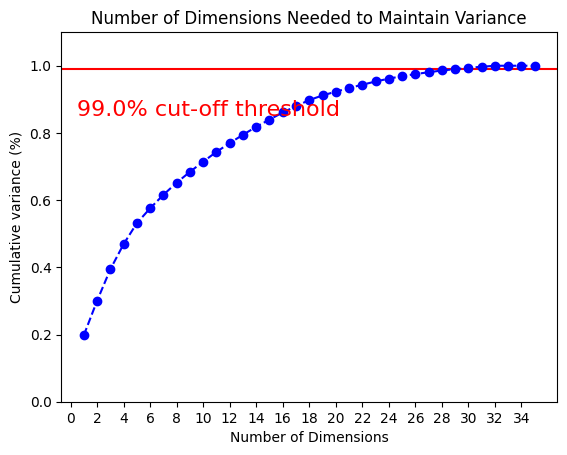

In [8]:
pca = PCA().fit(food_scaled)
variance_ratio = pca.explained_variance_ratio_
cumulative_variance_ratio = np.cumsum(variance_ratio)


xi = np.arange(1, len(variance_ratio)+1, step=1)
y = np.cumsum(variance_ratio)

plt.xticks(np.arange(0, 36, step=2)) 
plt.ylim(0.0,1.1)
plt.text(0.5, 0.85, f'{100*0.99}% cut-off threshold', color = 'red', fontsize=16)
plt.axhline(y = 0.99, color='r', linestyle='-')
plt.plot(xi, y, marker='o', linestyle='--', color='b')
plt.xlabel('Number of Dimensions')
plt.ylabel('Cumulative variance (%)')
plt.title('Number of Dimensions Needed to Maintain Variance')

plt.show()

Based on the variance curve above, in order to maintain 99% of the variance, we must reduce our dataset to a minimum of 29 dimensions. this indicates that there is low linear correlation between features and that we won't save much runtime for K-Means using PCA since we only omit 6 dimensions. Nevertheless, we now apply PCA reducing our dataset to 29.

In [9]:
pca = PCA(n_components=29)
food_pca_29 = pca.fit_transform(food_scaled)

food_pca_29.shape

(7083, 29)

#### K-Means

We will now determine the optimal K or optimal number of clusters based on our 29 dimension dataset using the 'Kneed' library. 

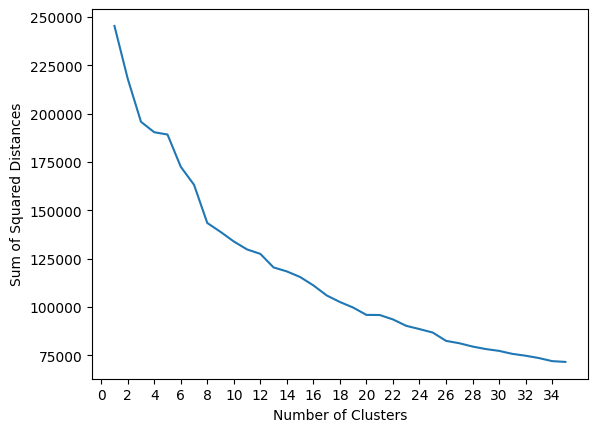

The knee point is at k=13


In [10]:
# Calculate the sum of squared distances from each point to its closest mean for different values of k
sumDist = []
for k in range(1, 36):
    kmeans = KMeans(n_clusters=k, random_state=0, n_init="auto").fit(food_pca_29)
    sumDist.append(kmeans.inertia_)

# Use the KneeLocator class to find the knee point
knee = KneeLocator(range(1, 36), sumDist, curve='convex', direction='decreasing')

# Get the value of k at the knee point
k = knee.knee

plt.plot(range(1, 36), sumDist)
plt.xticks(np.arange(0, 36, step=2))
plt.xlabel("Number of Clusters")
plt.ylabel("Sum of Squared Distances")
plt.show()

print("The knee point is at k=" + str(k))

We now run K-Means clustering with the optimal number of clusters (13) on the original dataset (prior to PCA dimensionality reduction).

c:\Users\Saif\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


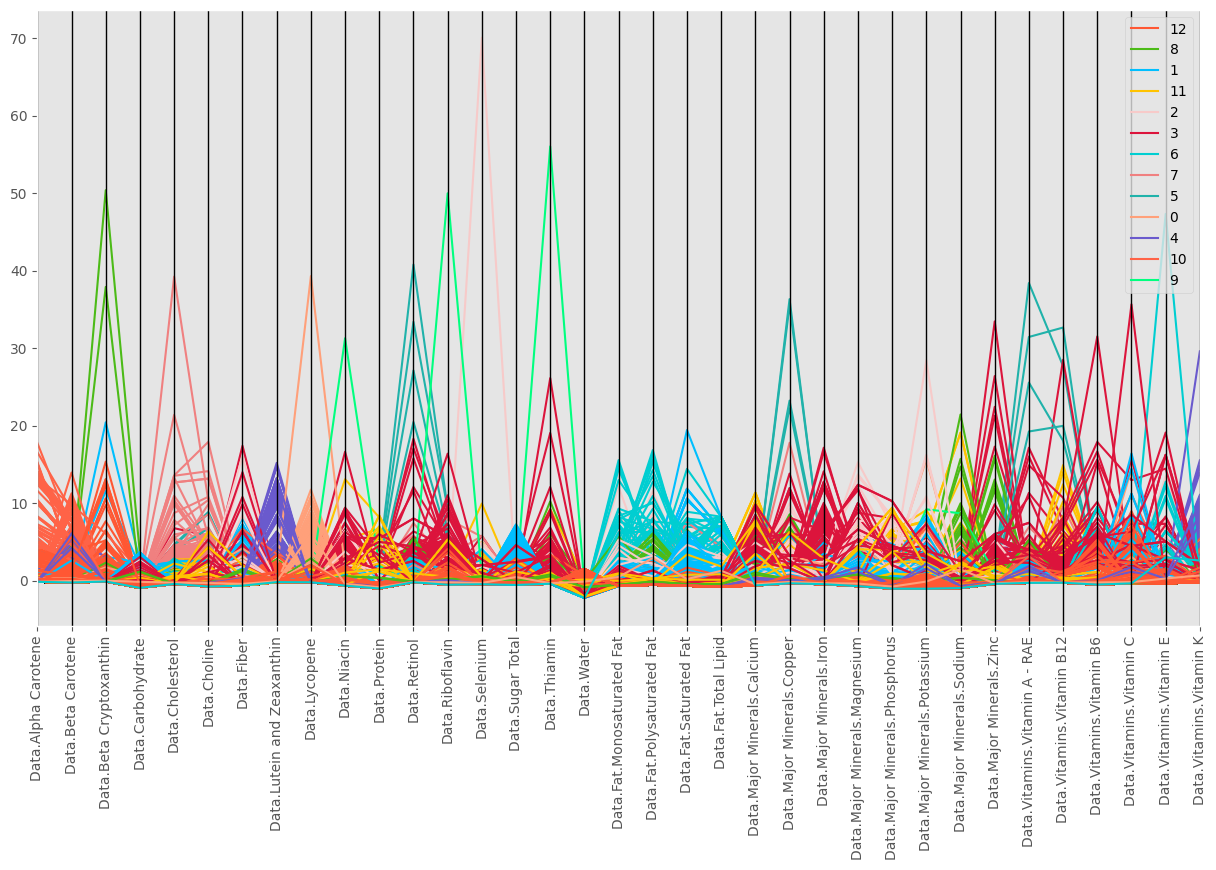

In [29]:
# Perform KMeans clustering with k=13
# fit the model to the feature data
thirteen_means = KMeans(n_clusters=13, random_state=0).fit(food_scaled)




food_scaled = pd.DataFrame(food_scaled, columns = food.columns)
food_scaled['cluster']=thirteen_means.labels_


with plt.style.context(("ggplot")):
    fig = plt.figure(figsize=(15,8))
    plt.xticks(rotation=90)
    pd.plotting.parallel_coordinates(
    food_scaled, 'cluster',
    color=('#FF5733', '#4CBB17', '#00BFFF', '#FFC300','#F7CAC9','#DC143C','#00CED1','#F08080','#20B2AA','#FFA07A','#6A5ACD','#FF6347', '#00FF7F'))



K = 13 On PCA with 29 Dimensions

c:\Users\Saif\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


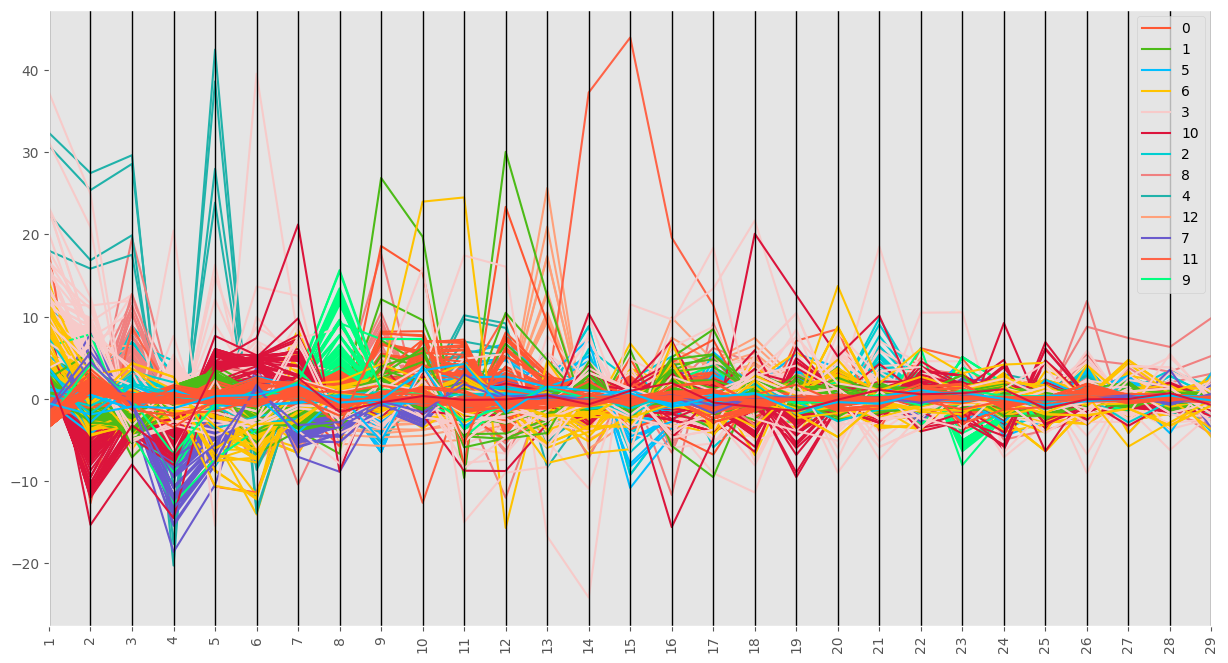

In [28]:
# Perform KMeans clustering with k=13
# fit the model to the feature data
thirteen_means = KMeans(n_clusters=13, random_state=0).fit(food_pca_29)

clustered = pd.DataFrame(food_pca_29, columns = range(1,30) )
clustered['cluster']=thirteen_means.labels_


with plt.style.context(("ggplot")):
    fig = plt.figure(figsize=(15,8))
    plt.xticks(rotation=90)
    pd.plotting.parallel_coordinates(
    clustered, 'cluster',
    color=('#FF5733', '#4CBB17', '#00BFFF', '#FFC300','#F7CAC9','#DC143C','#00CED1','#F08080','#20B2AA','#FFA07A','#6A5ACD','#FF6347', '#00FF7F'))



We now run K-Means with k=2 on the full 35 dimensions dataset with a hypothesis it will cluster based on healthy and unhealthy foods  

c:\Users\Saif\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


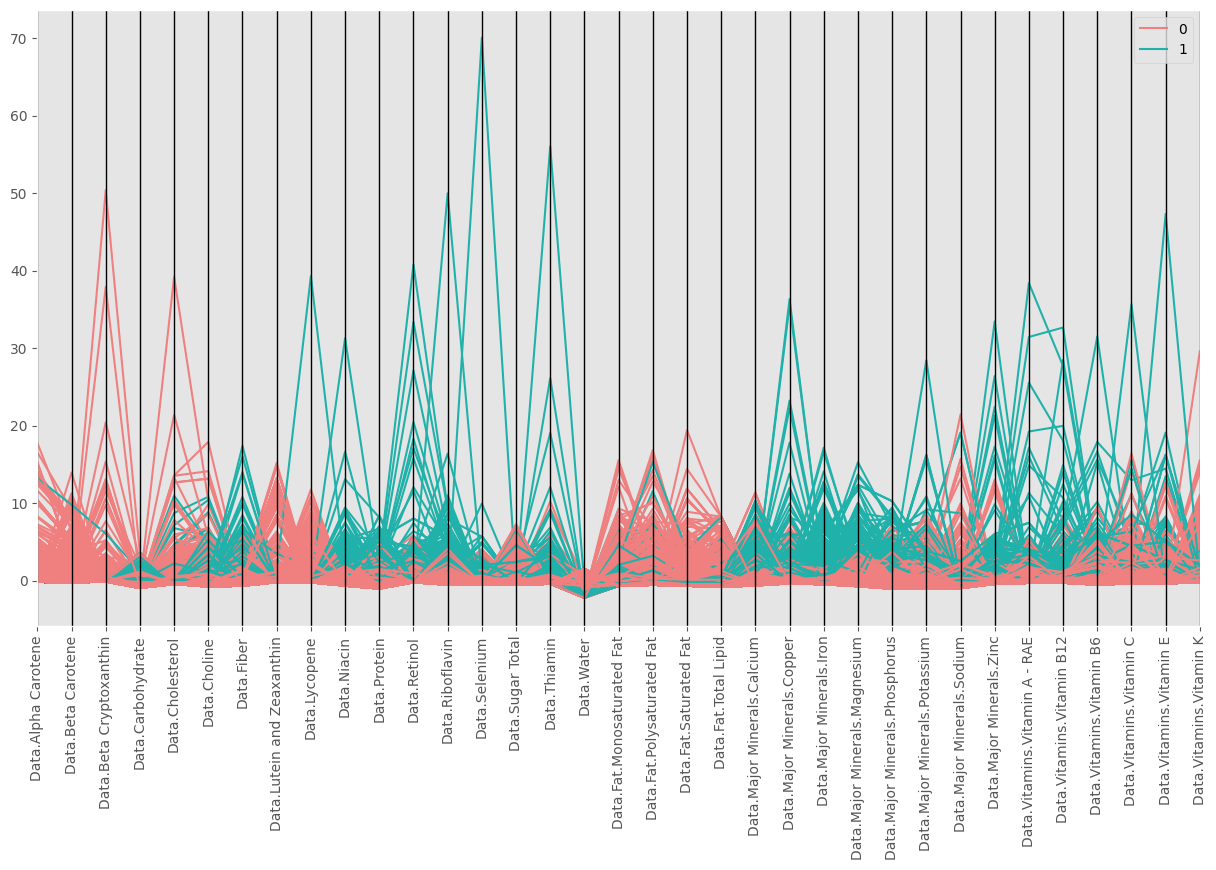

In [32]:
# Perform KMeans clustering with k=13
# fit the model to the feature data
two_means = KMeans(n_clusters=2, random_state=0).fit(food_scaled)


food_scaled = pd.DataFrame(food_scaled, columns = food.columns)
food_scaled['cluster']=two_means.labels_


with plt.style.context(("ggplot")):
    fig = plt.figure(figsize=(15,8))
    plt.xticks(rotation=90)
    pd.plotting.parallel_coordinates(
    food_scaled, 'cluster',
    color=('#FF5733', '#4CBB17'))

We now run K-Means with k=4 on the full 35 dimensions dataset with a hypothesis that it will cluster based on the 4 major food groups (Fruits & Vegetables, Grains, Protein Foods, and Dairy)

c:\Users\Saif\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


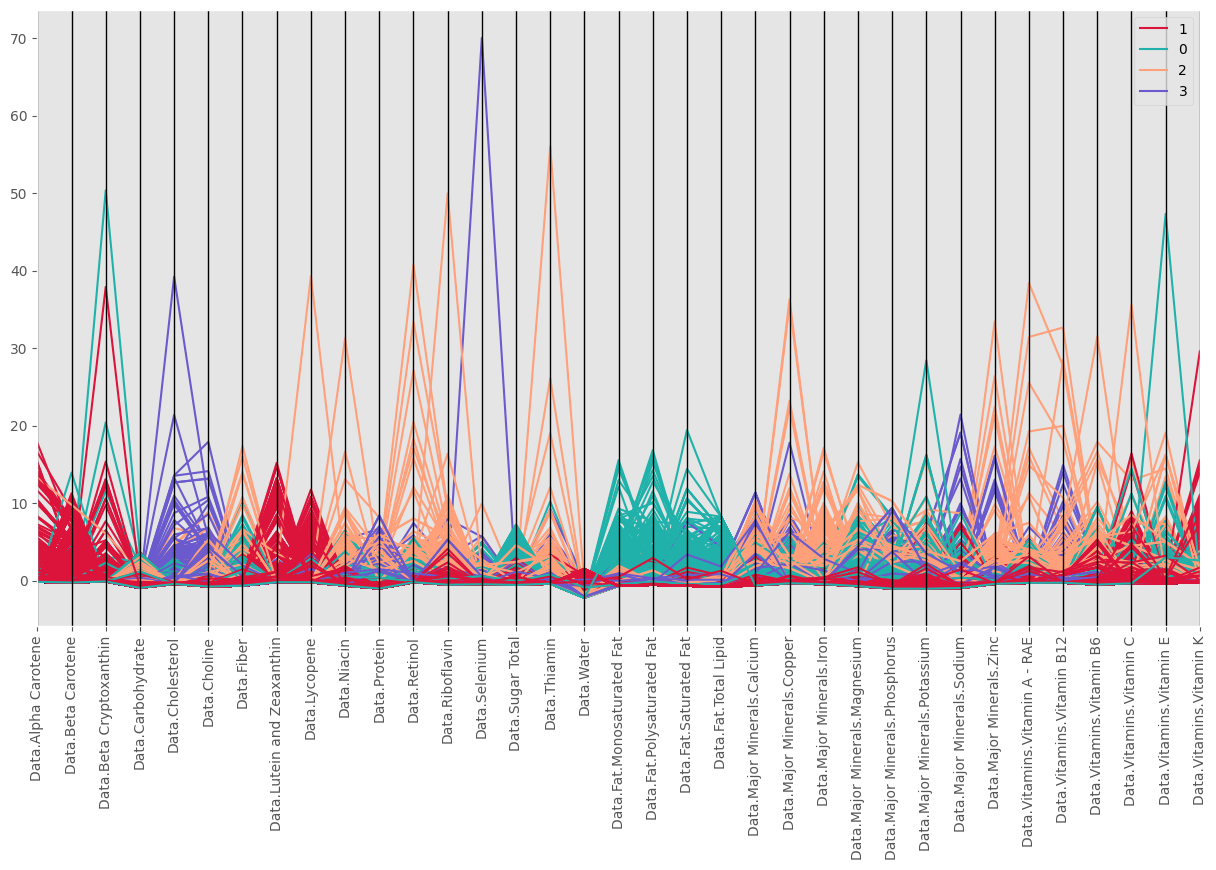

In [34]:
# Perform KMeans clustering with k=13
# fit the model to the feature data
four_means = KMeans(n_clusters=4, random_state=0).fit(food_scaled)


food_scaled = pd.DataFrame(food_scaled, columns = food.columns)
food_scaled['cluster']=four_means.labels_


with plt.style.context(("ggplot")):
    fig = plt.figure(figsize=(15,8))
    plt.xticks(rotation=90)
    pd.plotting.parallel_coordinates(
    food_scaled, 'cluster',
    color=('#DC143C','#20B2AA','#FFA07A','#6A5ACD'))

# Conclusions